# Импорты и настройки

In [73]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import shutil
import PIL

# EDA
Для начала посмотрим в директорию `train` и `test`, директорию `val` рассматривать не будем, т.к. там всего по 8 элементов категории больных и здоровых, я добавил эти снимки в тренировочную выборку.

В наборе данных со снимками лёгких с пневмонией видно что категория "больные" делится ещё на две подгруппы `virus` и `bacteria`, очевидно снимки лёгких с вирусной и бактериальной пневмонией.

Для удобства составления датасета для обучения и валидации я разделю данные следующим образом: все снимки здоровых лёгких я помещу в директорию `normal`. Снимки с бактериальной пневмонией поместим в директорию `bacteria` а снимки с вирусной пневмонией в директорию `virus`.

In [66]:
data_dir = Path("chest_xray")
train_dir = data_dir / "train"
test_dir = data_dir / "test"
val_dir = data_dir / "val"

# перенесём все снимки без заболеваний из val директороии в train
for file in (val_dir / "NORMAL").glob("*.jpeg"):
    file.rename(train_dir / "NORMAL" / file.name)
# перенесём все снимки больными лёгкими из val директороии в train
for file in (val_dir / "PNEUMONIA").glob("*.jpeg"):
   file.rename(train_dir / "PNEUMONIA" / file.name)

# создадим директории normal, virus и bacteria в train и test директориях
train_normal_dir = train_dir / "NORMAL"
train_normal_dir = train_normal_dir.rename(train_dir / "normal")
train_bacteria_dir = train_dir / "bacteria"
train_bacteria_dir.mkdir(exist_ok=True, parents=True)
train_virus_dir = train_dir / "virus"
train_virus_dir.mkdir(exist_ok=True, parents=True)

test_normal_dir = test_dir / "NORMAL"
test_normal_dir = test_normal_dir.rename(test_dir / "normal")
test_bacteria_dir = test_dir / "bacteria"
test_bacteria_dir.mkdir(exist_ok=True, parents=True)
test_virus_dir = test_dir / "virus"
test_virus_dir.mkdir(exist_ok=True, parents=True)

# перенесём соответствующие снимки по соответствующим директориям
for file in (train_dir / "PNEUMONIA").glob("*_bacteria_*.jpeg"):
    file.rename(train_bacteria_dir / file.name)

for file in (train_dir / "PNEUMONIA").glob("*_virus_*.jpeg"):
    file.rename(train_virus_dir / file.name)

for file in (test_dir / "PNEUMONIA").glob("*_bacteria_*.jpeg"):
    file.rename(test_bacteria_dir / file.name)

for file in (test_dir / "PNEUMONIA").glob("*_virus_*.jpeg"):
    file.rename(test_virus_dir / file.name)

# удалим ненужные директории
shutil.rmtree(train_dir / "PNEUMONIA")
shutil.rmtree(test_dir / "PNEUMONIA")
shutil.rmtree(val_dir)

Посмотрим каково распределение классов в данных для обучения и в тестовых данных:

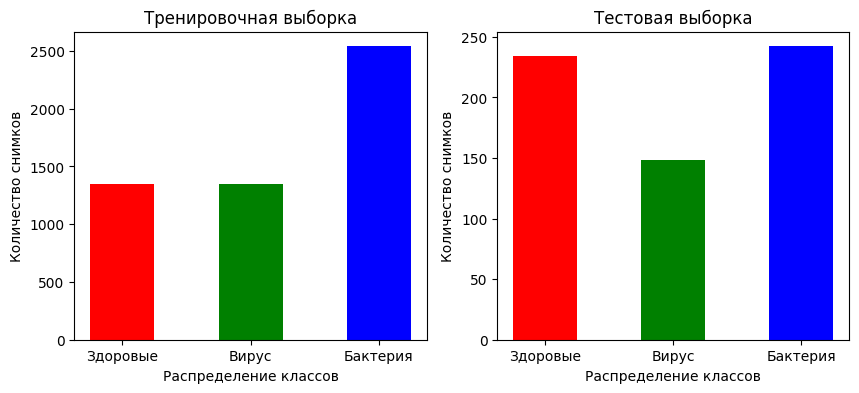

In [72]:
train_0_count = len(list(train_normal_dir.glob("*.jpeg")))
train_1_count = len(list(train_virus_dir.glob("*.jpeg")))
train_2_count = len(list(train_bacteria_dir.glob("*.jpeg")))

test_0_count = len(list(test_normal_dir.glob("*.jpeg")))
test_1_count = len(list(test_virus_dir.glob("*.jpeg")))
test_2_count = len(list(test_bacteria_dir.glob("*.jpeg")))

fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
ax[0].bar(0, train_0_count, width=0.25, color='r')
ax[0].bar(.5, train_1_count, width=0.25, color='g')
ax[0].bar(1, train_2_count, width=0.25, color='b')
ax[0].set_ylabel('Количество снимков')
ax[0].set_xlabel('Распределение классов')
ax[0].set_xticks([0, 0.5, 1], ['Здоровые', 'Вирус', 'Бактерия'])
ax[0].set_title("Тренировочная выборка")

ax[1].bar(0, test_0_count, width=0.25, color='r')
ax[1].bar(.5, test_1_count, width=0.25, color='g')
ax[1].bar(1, test_2_count, width=0.25, color='b')
ax[1].set_ylabel('Количество снимков')
ax[1].set_xlabel('Распределение классов')
ax[1].set_xticks([0, 0.5, 1], ['Здоровые', 'Вирус', 'Бактерия'])
ax[1].set_title("Тестовая выборка")
plt.show()

Как можем заметить присутствует дисбаланс классов, снимков с бактериальной пневмонией немногим менее чем в 2 раза больше. Попробуем пока не убирать данный дисбаланс; если далее мы поймём что это повлияет на качество обученной модели - то попробуем немного сократить дисбаланс.

Отобразим несколько изображений из тренировочного датасета:

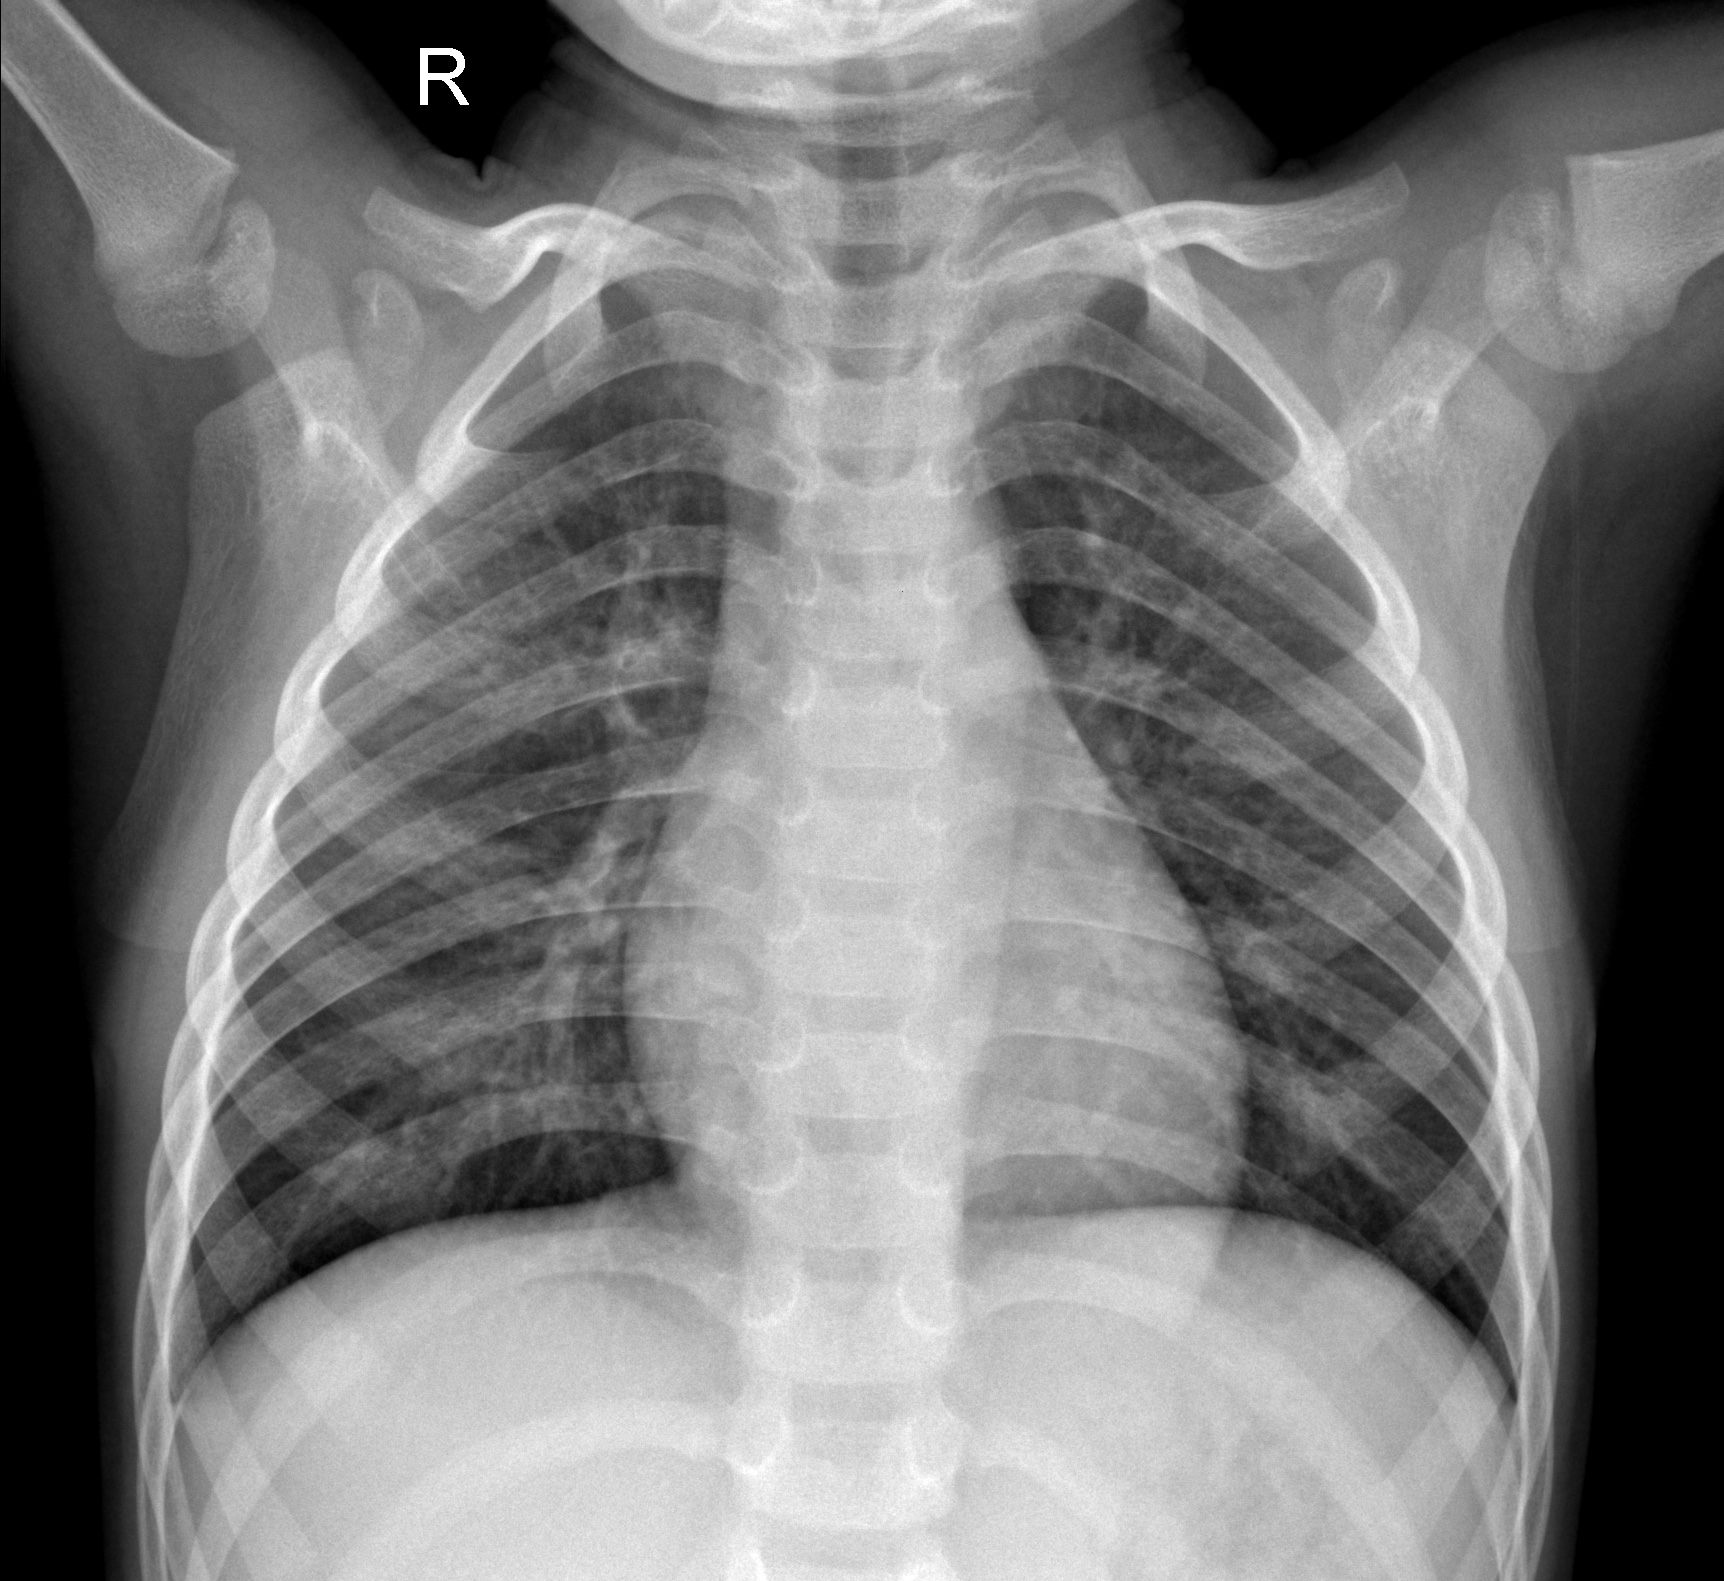

In [76]:
file_name = str(list(train_normal_dir.glob("*.jpeg"))[10])
PIL.Image.open(file_name)

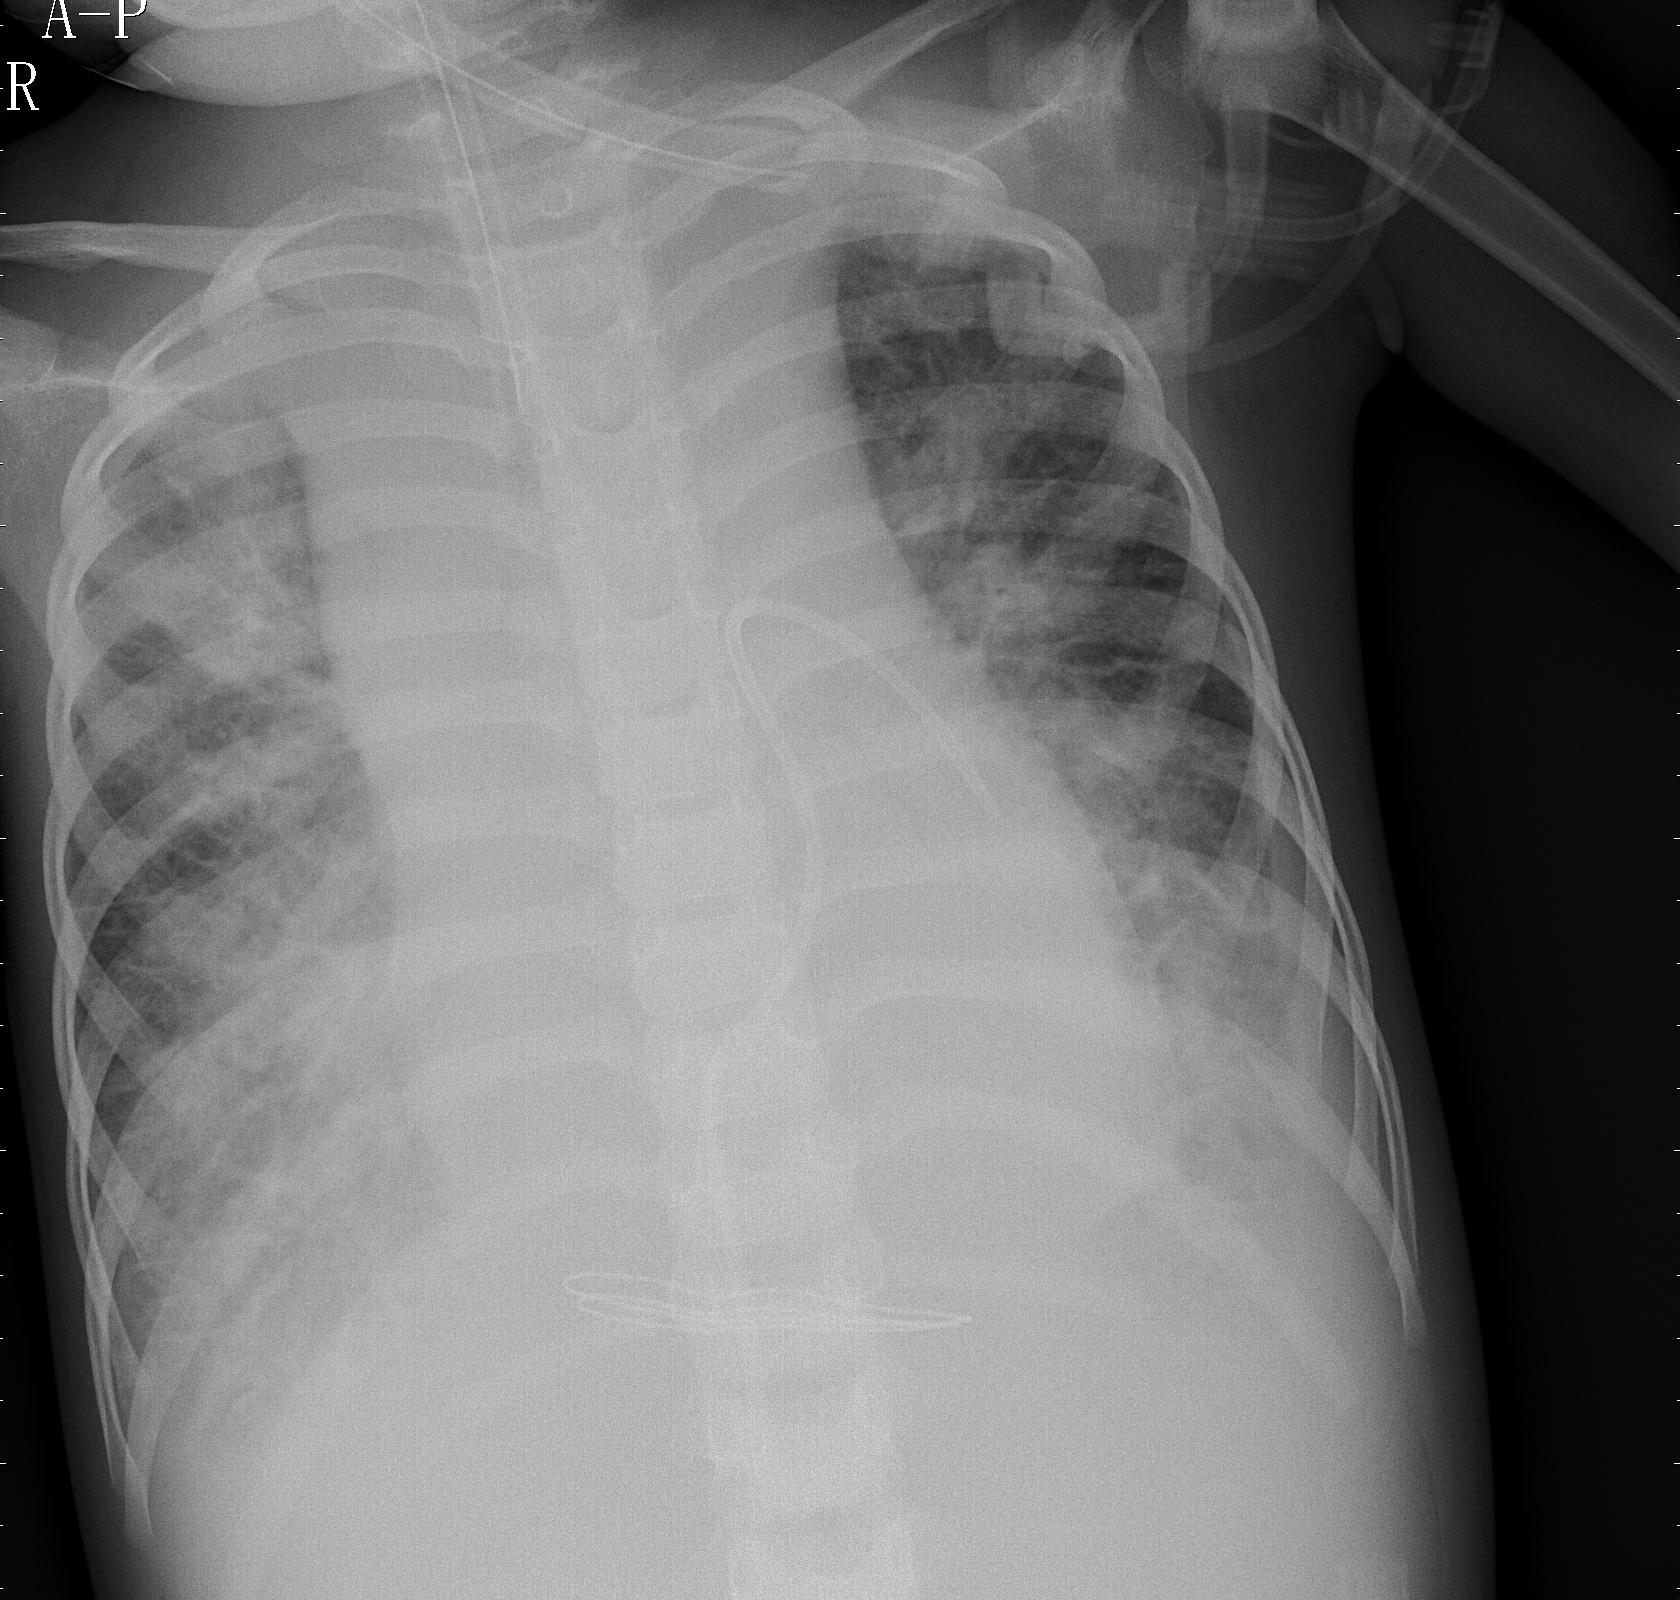

In [77]:
file_name = str(list(train_virus_dir.glob("*.jpeg"))[10])
PIL.Image.open(file_name)

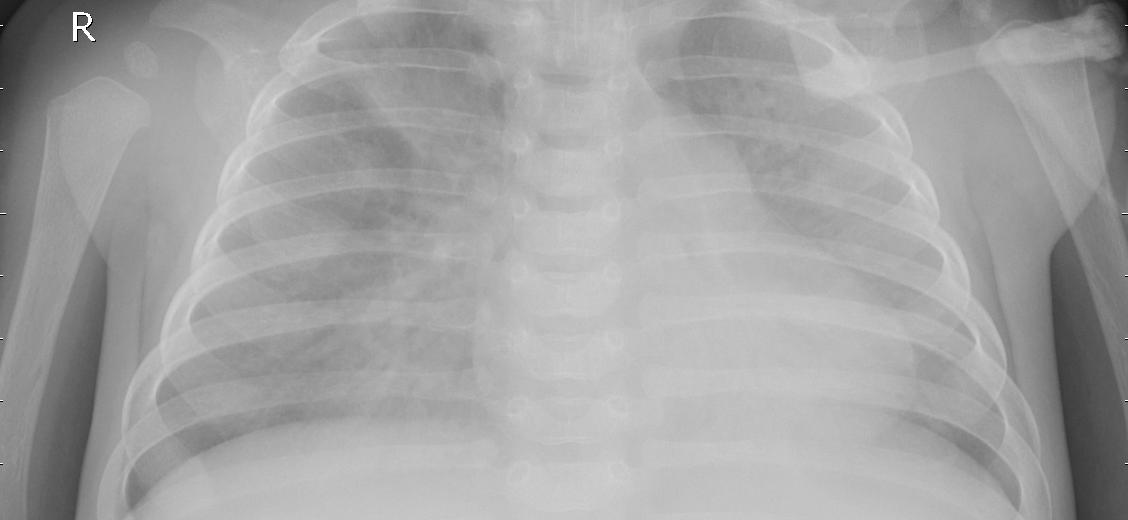

In [78]:
file_name = str(list(train_bacteria_dir.glob("*.jpeg"))[10])
PIL.Image.open(file_name)